In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="EwztU04tNkHQwiBBSShs")
project = rf.workspace("new-workspace-0sgfu").project("lfw_face")
version = project.version(1)
dataset = version.download("yolov7")

loading Roboflow workspace...
loading Roboflow project...


In [2]:
# Complete code in a Jupyter Notebook cell
import os
import cv2
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image

In [3]:
# Installing ultralytics
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 kB 7.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [4]:
%cd /content
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7


/content
Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197
Receiving objects: 100% (1197/1197), 74.23 MiB | 13.95 MiB/s, done.
Resolving deltas: 100% (519/519), done.
/content/yolov7


In [5]:
!pip install torch torchvision torchaudio torchtext


In [13]:
!python train.py --batch-size 16 --cfg cfg/training/yolov7.yaml --epochs 10 --data /content/lfw_face-1/data.yaml --weights yolov7.pt --device 0 #train the model on our dataset for 20 epochs


2024-05-07 03:50:47.277498: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 03:50:47.277565: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-07 03:50:47.279673: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-07 03:50:47.291528: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-07 03:50:48.689458: W tensorflow/compiler/tf2

In [16]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [17]:

# Copy the trained model to Google Drive
import shutil
shutil.copy2("/content/yolov7/runs/train/exp7/weights/best.pt", '/content/drive/MyDrive/GP_YOLOV7Model')

'/content/drive/MyDrive/GP_YOLOV7Model/best.pt'

In [18]:

# Copy the trained model to Google Drive
import shutil
shutil.copy2("/content/yolov7/runs/train/exp7/weights/last.pt", '/content/drive/MyDrive/GP_YOLOV7Model')

'/content/drive/MyDrive/GP_YOLOV7Model/last.pt'

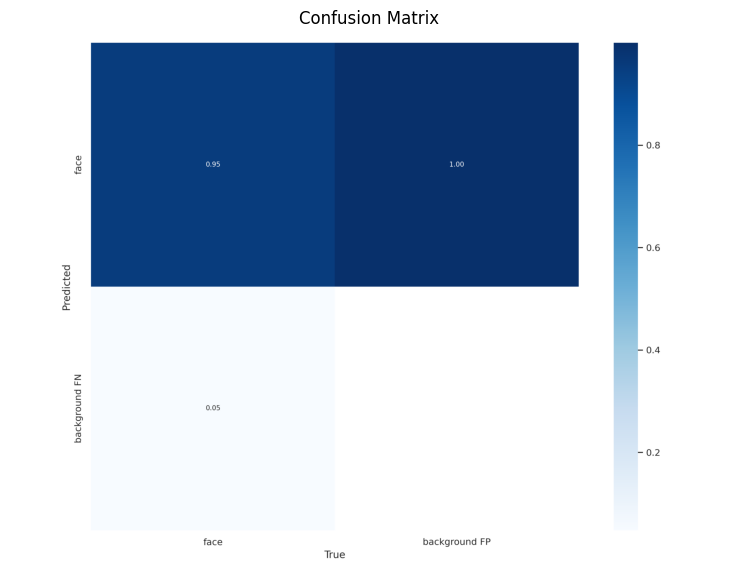

In [19]:
import cv2
import matplotlib.pyplot as plt

# Path to the confusion matrix image
image_path = '/content/yolov7/runs/train/exp7/confusion_matrix.png'

# Load the image
image = cv2.imread(image_path)

# Convert color from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 7))  # defined the figure size
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('Confusion Matrix')
plt.show()


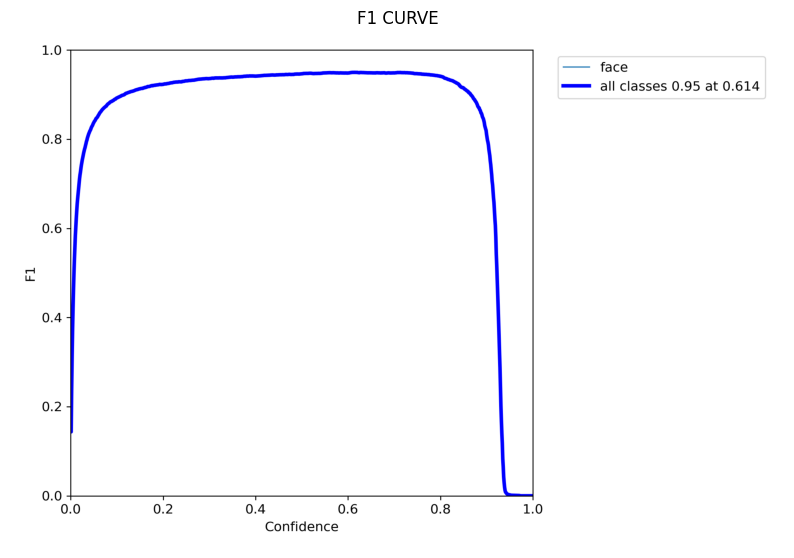

In [20]:
import cv2
import matplotlib.pyplot as plt

# Path to the confusion matrix image
image_path = '/content/yolov7/runs/train/exp7/F1_curve.png'

# Load the image
image = cv2.imread(image_path)

# Convert color from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 7))  # defined the figure size
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('F1 CURVE')
plt.show()


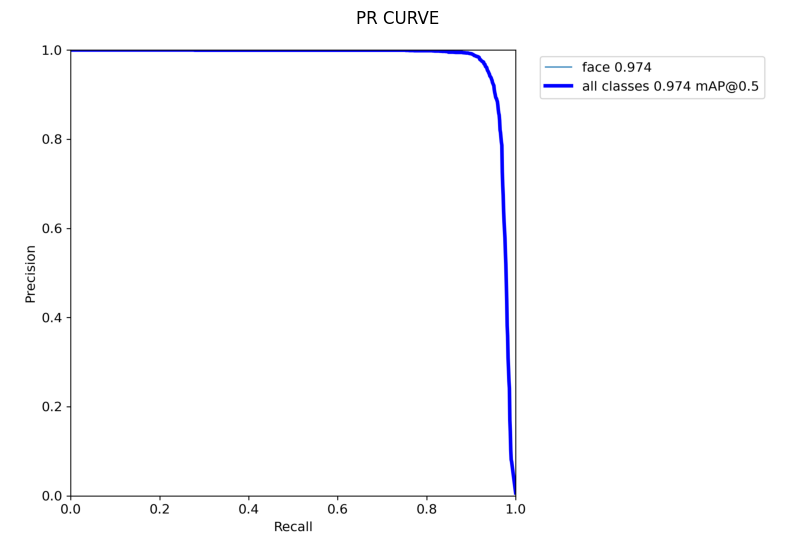

In [21]:
import cv2
import matplotlib.pyplot as plt

# Path to the confusion matrix image
image_path = '/content/yolov7/runs/train/exp7/PR_curve.png'

# Load the image
image = cv2.imread(image_path)

# Convert color from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 7))  # defined the figure size
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('PR CURVE')
plt.show()


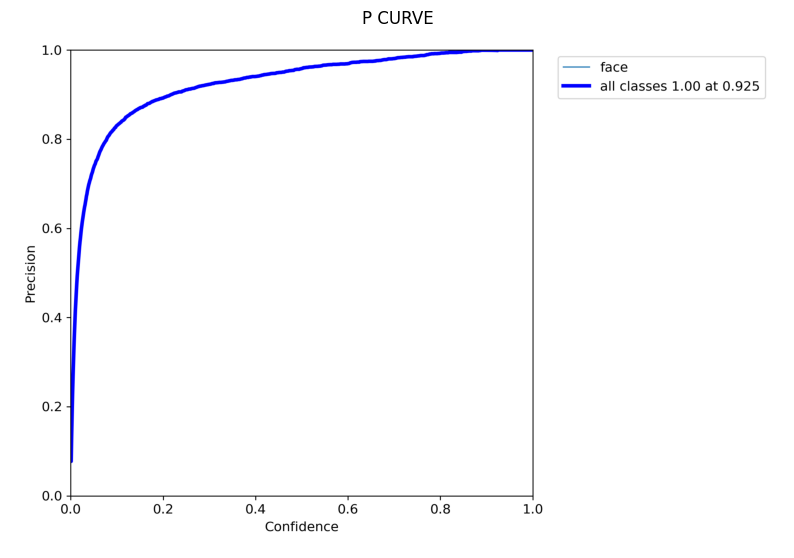

In [22]:
import cv2
import matplotlib.pyplot as plt

# Path to the confusion matrix image
image_path = '/content/yolov7/runs/train/exp7/P_curve.png'

# Load the image
image = cv2.imread(image_path)

# Convert color from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 7))  # defined the figure size
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('P CURVE')
plt.show()


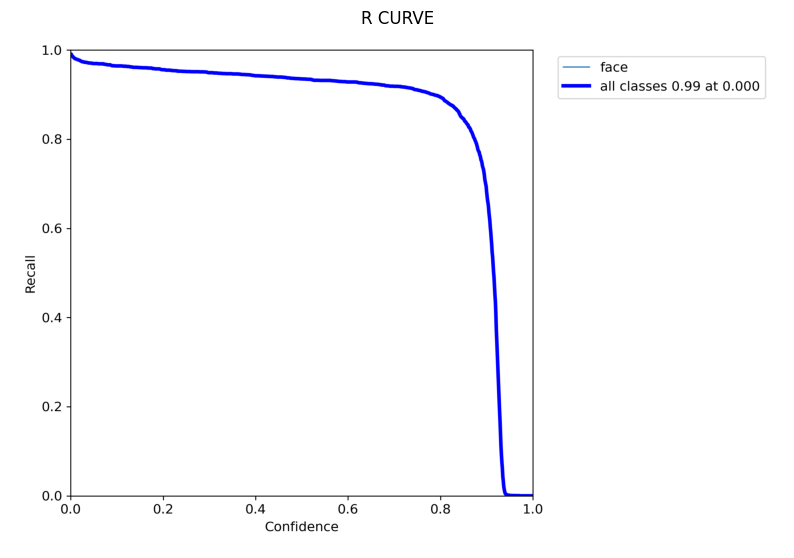

In [23]:
import cv2
import matplotlib.pyplot as plt

# Path to the confusion matrix image
image_path = '/content/yolov7/runs/train/exp7/R_curve.png'

# Load the image
image = cv2.imread(image_path)

# Convert color from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 7))  # defined the figure size
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('R CURVE')
plt.show()


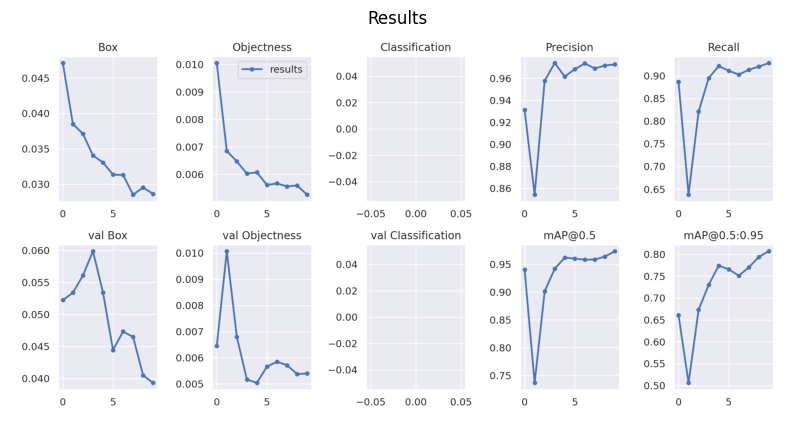

In [24]:
import cv2
import matplotlib.pyplot as plt

# Path to the confusion matrix image
image_path = '/content/yolov7/runs/train/exp7/results.png'

# Load the image
image = cv2.imread(image_path)

# Convert color from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 7))  # defined the figure size
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('Results')
plt.show()


In [25]:

# Copy the trained model to Google Drive
import shutil
shutil.copy2("/content/yolov7/cfg/training/yolov7.yaml", '/content/drive/MyDrive/GP_YOLOV7Model')

'/content/drive/MyDrive/GP_YOLOV7Model/yolov7.yaml'

In [26]:

# Copy the trained model to Google Drive
import shutil
shutil.copy2("/content/yolov7/detect.py", '/content/drive/MyDrive/GP_YOLOV7Model')

'/content/drive/MyDrive/GP_YOLOV7Model/detect.py'